In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns


In [4]:
import pandas as pd
df = pd.read_csv('/Users/adityametkar/Desktop/data analysis/auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [7]:
df["horsepower"] = df["horsepower"].replace("?",pd.NA)

In [8]:
df["horsepower"]=pd.to_numeric(df["horsepower"])

In [9]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [11]:

median_hp = df['horsepower'].median()

df['horsepower'].fillna(median_hp, inplace=True)


/var/folders/gd/h2h0m2md0wq05bmf7__dd_gw0000gn/T/ipykernel_1822/2226774573.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(median_hp, inplace=True)


In [12]:
print(df.isnull().sum())


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [13]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [14]:
#Exploratory Data Analysis begin

In [15]:
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.304020  2970.424623   
std      7.815984    1.701004    104.269838   38.222625   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.0000

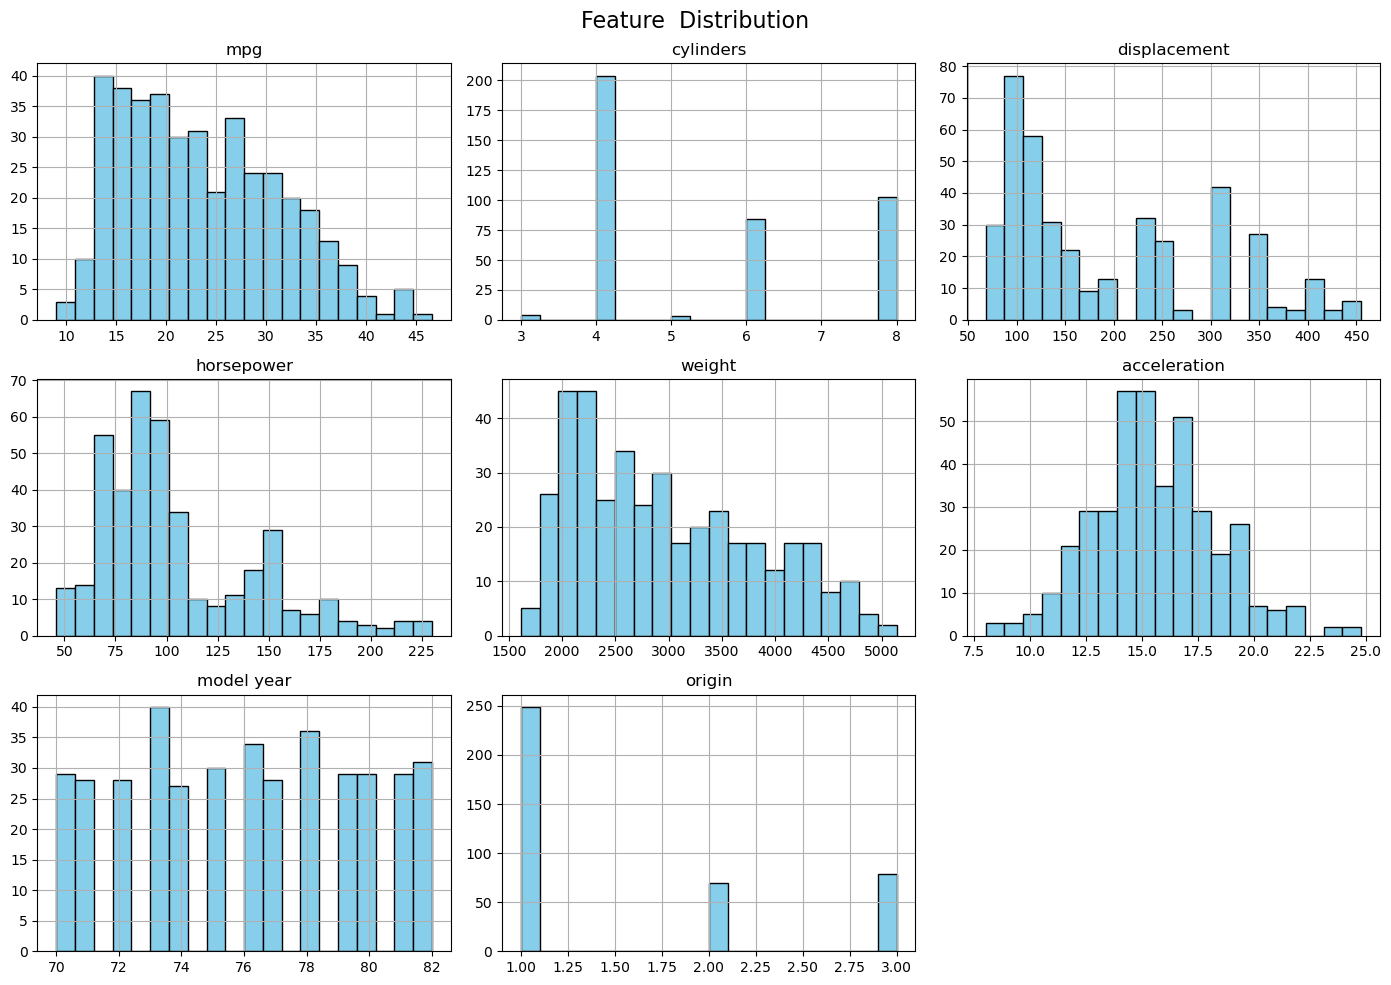

In [17]:
df.hist(bins=20,figsize = (14,10), color = "skyblue", edgecolor= "black")
mlt.suptitle("Feature  Distribution",fontsize = 16)
mlt.tight_layout()
mlt.show()

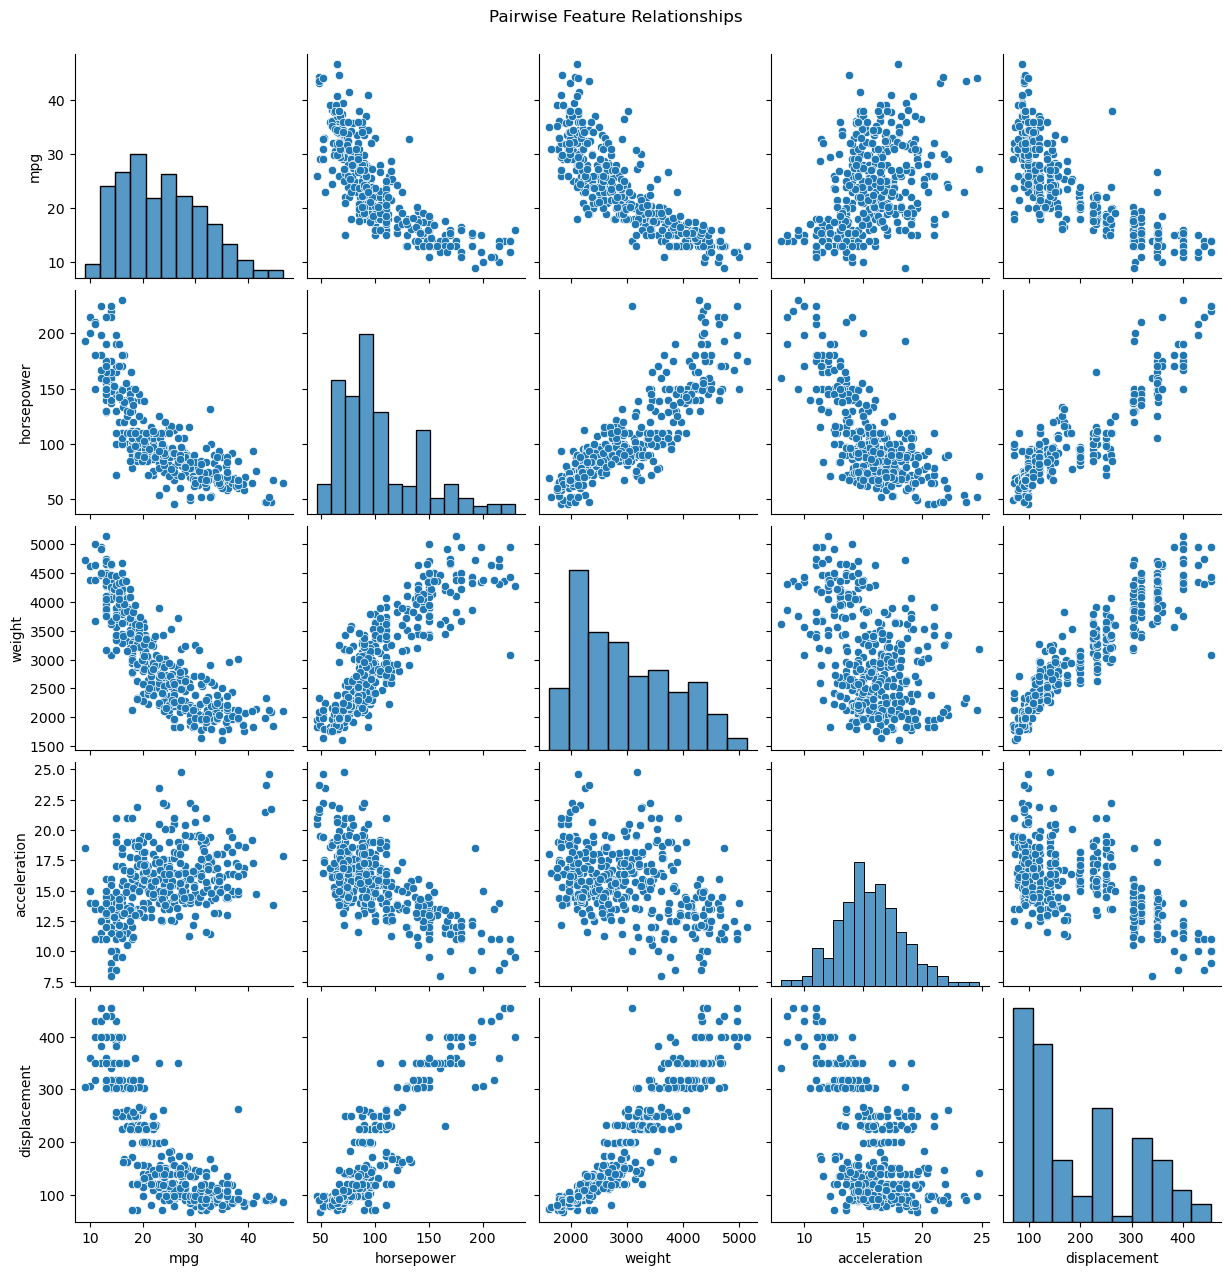

In [20]:
sns.pairplot(df[["mpg","horsepower","weight","acceleration","displacement"]])
mlt.suptitle("Pairwise Feature Relationships" , y=1.02)
mlt.show()

In [21]:
#Boxplot outlier detection

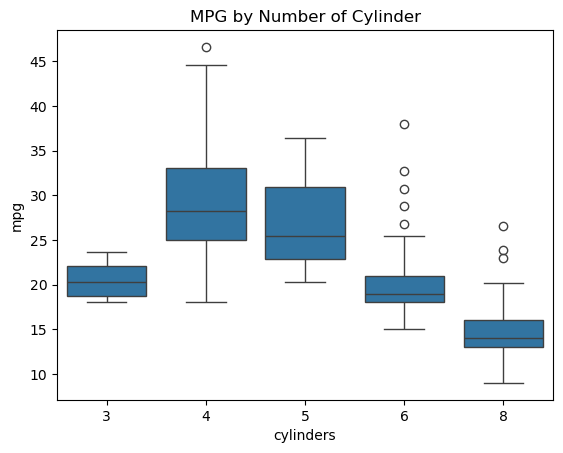

In [23]:
sns.boxplot(x="cylinders",y="mpg", data=df)
mlt.title("MPG by Number of Cylinder")
mlt.show()

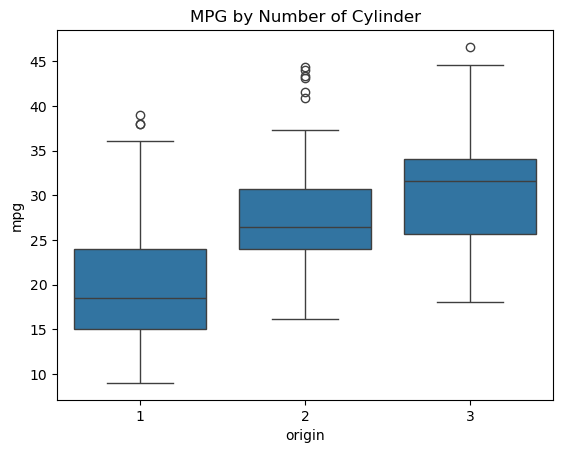

In [24]:
sns.boxplot(x="origin",y="mpg", data=df)
mlt.title("MPG by Number of Cylinder")
mlt.show()

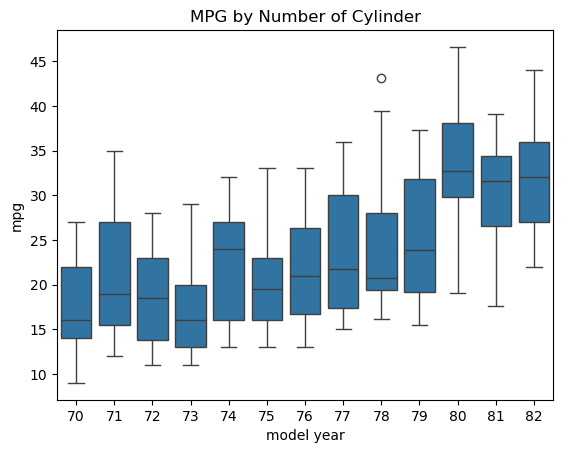

In [25]:
sns.boxplot(x="model year",y="mpg", data=df)
mlt.title("MPG by Number of Cylinder")
mlt.show()

In [37]:

print(df.isnull().sum())


mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin          398
dtype: int64


In [36]:
df.drop(columns=['car name'], inplace=True)


In [38]:
df = pd.get_dummies(df, columns=['origin'], drop_first=True)


In [39]:
X = df.drop(columns=['mpg'])  # Features
y = df['mpg']                 # Target variable


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error


In [45]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [46]:
y_pred_lr = lr.predict(X_test_scaled)

In [50]:
print("📉 Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:",root_mean_squared_error(y_test, y_pred_lr, ))
print("R² Score:", r2_score(y_test, y_pred_lr))


📉 Linear Regression Performance:
MAE: 2.4667808004520317
MSE: 9.440068465263375
RMSE: 3.07246944089984
R² Score: 0.8244245330943359


In [58]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # No need to scale for tree-based models


RandomForestRegressor(random_state=42)

In [59]:
y_pred_rf = rf.predict(X_test)


In [60]:
print("\n🌲 Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf, ))
print("R² Score:", r2_score(y_test, y_pred_rf))



🌲 Random Forest Performance:
MAE: 1.6479499999999994
MSE: 4.877720575
RMSE: 2.2085562195696986
R² Score: 0.909279464387116


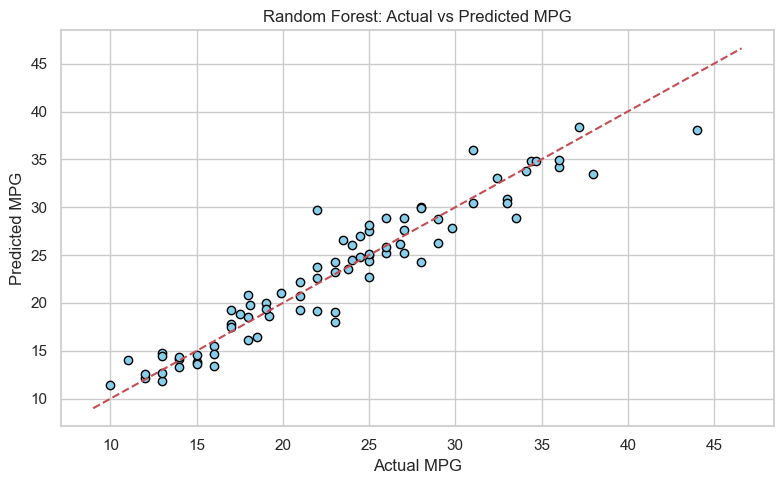

In [61]:
import matplotlib.pyplot as plt

mlt.figure(figsize=(8,5))
mlt.scatter(y_test, y_pred_rf, color='skyblue', edgecolor='black')
mlt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
mlt.xlabel("Actual MPG")
mlt.ylabel("Predicted MPG")
mlt.title("Random Forest: Actual vs Predicted MPG")
mlt.tight_layout()
mlt.show()


In [62]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_

print("🔍 Best Parameters:", grid_search.best_params_)


🔍 Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [63]:
# Predict using best model
y_pred_best = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("\n✅ Tuned Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("RMSE:", root_mean_squared_error(y_test, y_pred_best, ))
print("R² Score:", r2_score(y_test, y_pred_best))



✅ Tuned Random Forest Performance:
MAE: 1.643482730421874
MSE: 4.965849408251643
RMSE: 2.2284185891011687
R² Score: 0.9076403596387823


/var/folders/gd/h2h0m2md0wq05bmf7__dd_gw0000gn/T/ipykernel_1822/2483673290.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
/var/folders/gd/h2h0m2md0wq05bmf7__dd_gw0000gn/T/ipykernel_1822/2483673290.py:11: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/Users/adityametkar/Desktop/anaconda/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


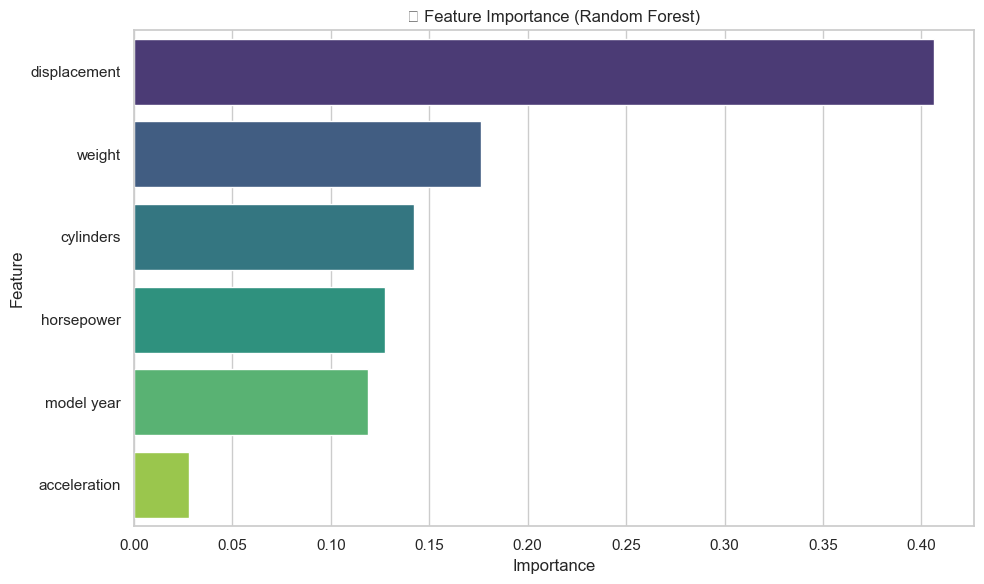

In [64]:

importances = best_rf.feature_importances_
features = X.columns


feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title("🎯 Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


In [66]:
# Collect metrics
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Tuned Random Forest'],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_best)
    ],
    'RMSE': [
        root_mean_squared_error(y_test, y_pred_lr, ),
        root_mean_squared_error(y_test, y_pred_rf, ),
        root_mean_squared_error(y_test, y_pred_best,)
    ]
})

results.sort_values(by='R2 Score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results


,Model,R2 Score,RMSE
0,Random Forest,0.909279,2.208556
1,Tuned Random Forest,0.907640,2.228419
2,Linear Regression,0.824425,3.072469


/var/folders/gd/h2h0m2md0wq05bmf7__dd_gw0000gn/T/ipykernel_1822/516920272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=results, palette='Set2')
/var/folders/gd/h2h0m2md0wq05bmf7__dd_gw0000gn/T/ipykernel_1822/516920272.py:5: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  mlt.tight_layout()
/Users/adityametkar/Desktop/anaconda/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


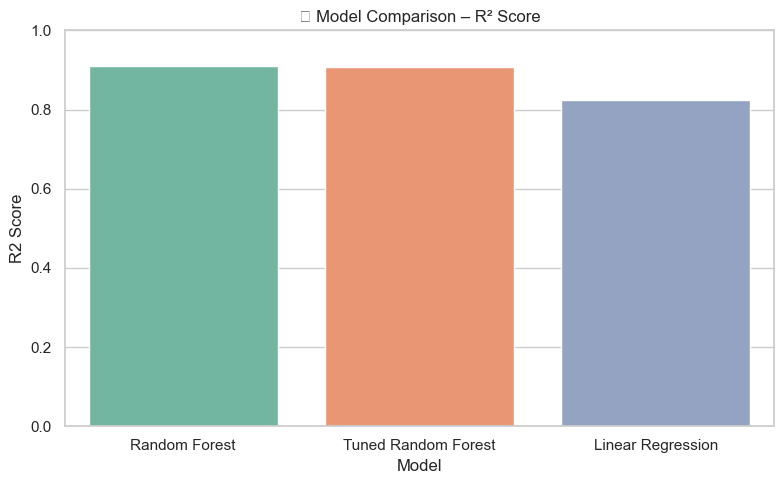

/var/folders/gd/h2h0m2md0wq05bmf7__dd_gw0000gn/T/ipykernel_1822/516920272.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results, palette='Set1')
/var/folders/gd/h2h0m2md0wq05bmf7__dd_gw0000gn/T/ipykernel_1822/516920272.py:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  mlt.tight_layout()
/Users/adityametkar/Desktop/anaconda/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


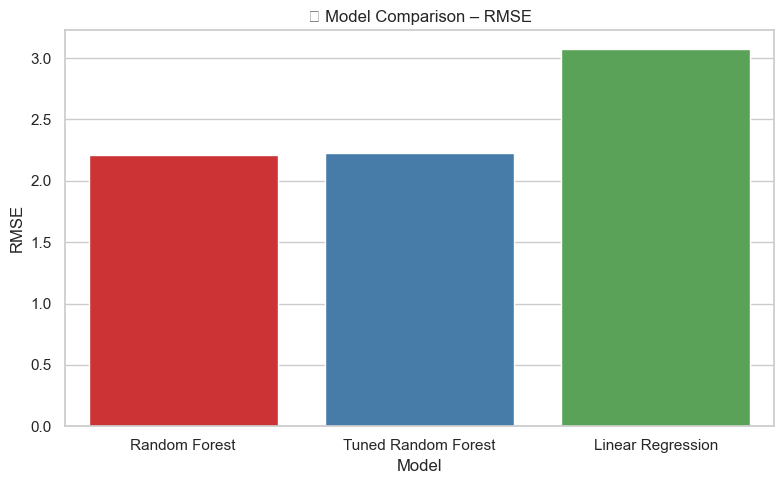

In [67]:
mlt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2 Score', data=results, palette='Set2')
mlt.title("📊 Model Comparison – R² Score")
mlt.ylim(0, 1)
mlt.tight_layout()
mlt.show()

mlt.figure(figsize=(8,5))
sns.barplot(x='Model', y='RMSE', data=results, palette='Set1')
mlt.title("📉 Model Comparison – RMSE")
mlt.tight_layout()
mlt.show()
